## Reading data from raw files

### Mask use by county

COUNTYFP: The county FIPS code.

NEVER: The estimated share of people in this county who would say never in response to the question “How often do you wear a mask in public when you expect to be within six feet of another person?”

RARELY: The estimated share of people in this county who would say rarely

SOMETIMES: The estimated share of people in this county who would say sometimes

FREQUENTLY: The estimated share of people in this county who would say frequently

ALWAYS: The estimated share of people in this county who would say always

In [237]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [238]:
mask_county=pd.read_csv('mask-use-by-county.csv')

In [239]:
mask_county.head()

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459


### US state and territorial Public mask mandates data

In [241]:
US_mask_mandates=pd.read_csv('U.S._State_and_Territorial_Public_Mask_Mandates_From_April_10__2020_through_August_15__2021_by_County_by_Day.csv')

In [242]:
US_mask_mandates.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,AL,Autauga County,1,1,4/10/2020,2,NaN,NaN,NaN,NaN
1,AL,Autauga County,1,1,4/11/2020,2,NaN,NaN,NaN,NaN
2,AL,Autauga County,1,1,4/12/2020,2,NaN,NaN,NaN,NaN
3,AL,Autauga County,1,1,4/13/2020,2,NaN,NaN,NaN,NaN
4,AL,Autauga County,1,1,4/14/2020,2,NaN,NaN,NaN,NaN


In [243]:
US_mask_mandates.columns

Index(['State_Tribe_Territory', 'County_Name', 'FIPS_State', 'FIPS_County',
       'date', 'order_code', 'Face_Masks_Required_in_Public',
       'Source_of_Action', 'URL', 'Citation'],
      dtype='object')

In [244]:
len(US_mask_mandates)

1593869

In [245]:
US_mask_mandates.isnull().sum()

State_Tribe_Territory                 0
County_Name                           0
FIPS_State                            0
FIPS_County                           0
date                                  0
order_code                            0
Face_Masks_Required_in_Public    606314
Source_of_Action                 606314
URL                              651574
Citation                         616596
dtype: int64

### Reading and cleaning the John Hopkins data

There are multiple datasets. I am recursively reading the files from the folder and loading that in a dataframe

In [246]:
import glob
import os
import pandas as pd

folder_name = 'john_hopkins'
file_type = 'csv'
seperator =','
for f in glob.glob(folder_name + "/*."+file_type):
    words=f.split('\\')
    words2=words[1].split('_')
    df_name=words2[0]+'_' + words2[1]+'_'+words2[2]
    df_name=df_name.split('.')
    print(df_name[0])
    exec(df_name[0] + " = pd.read_csv(f)")

    

CONVENIENT_global_confirmed
CONVENIENT_global_deaths
CONVENIENT_global_metadata
CONVENIENT_us_confirmed
CONVENIENT_us_deaths
CONVENIENT_us_metadata
RAW_global_confirmed
RAW_global_deaths
RAW_us_confirmed
RAW_us_deaths


Printing each datasets to check the type of data stored and if needs any immediate preprocessing

US data sources at the state (Admin1) or county/city (Admin2) level

In [252]:
us_metadata.head()

,Province_State,Admin2,Population,Lat,Long
0,Alabama,Autauga,55869,32.539527,-86.644082
1,Alabama,Baldwin,223234,30.727750,-87.722071
2,Alabama,Barbour,24686,31.868263,-85.387129
3,Alabama,Bibb,22394,32.996421,-87.125115
4,Alabama,Blount,57826,33.982109,-86.567906


In [732]:
RAW_us_confirmed.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/22/22,10/23/22,10/24/22,10/25/22,10/26/22,10/27/22,10/28/22,10/29/22,10/30/22,10/31/22
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,...,18480,18480,18480,18480,18480,18511,18511,18511,18511,18511
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,...,65895,65895,65895,65895,65895,65973,65973,65973,65973,65973
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,...,6926,6926,6926,6926,6926,6930,6930,6930,6930,6930
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,...,7560,7560,7560,7560,7560,7575,7575,7575,7575,7575
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,...,17286,17286,17286,17286,17286,17320,17320,17320,17320,17320


### Assigned county to me - Hamilton (Ohio)

US data sources at the state (Admin1) or county/city (Admin2) level



In [591]:
county='hamilton'
state='ohio'



### Select data for the allocated county

In [658]:
RAW_us_confirmed_county=RAW_us_confirmed[(us_confirmed['Admin2'].str.lower()==county) & (us_confirmed['Province_State'].str.lower()==state)]
RAW_us_confirmed_county.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/22/22,10/23/22,10/24/22,10/25/22,10/26/22,10/27/22,10/28/22,10/29/22,10/30/22,10/31/22
2154,Ohio,Hamilton,84039061,US,USA,840,39061.0,US,39.196736,-84.545029,...,222672,222672,222672,222672,222672,223461,223461,223461,223461,223461


In [659]:
RAW_us_deaths_county=RAW_us_confirmed[(us_confirmed['Admin2'].str.lower()==county) & (us_confirmed['Province_State'].str.lower()==state)]
RAW_us_deaths_county.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/22/22,10/23/22,10/24/22,10/25/22,10/26/22,10/27/22,10/28/22,10/29/22,10/30/22,10/31/22
2154,Ohio,Hamilton,84039061,US,USA,840,39061.0,US,39.196736,-84.545029,...,222672,222672,222672,222672,222672,223461,223461,223461,223461,223461


In [660]:
RAW_us_metadata_county=RAW_us_confirmed[(us_confirmed['Admin2'].str.lower()==county) & (us_confirmed['Province_State'].str.lower()==state)]
RAW_us_metadata_county.head(10)

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/22/22,10/23/22,10/24/22,10/25/22,10/26/22,10/27/22,10/28/22,10/29/22,10/30/22,10/31/22
2154,Ohio,Hamilton,84039061,US,USA,840,39061.0,US,39.196736,-84.545029,...,222672,222672,222672,222672,222672,223461,223461,223461,223461,223461


In [661]:
US_mask_mandates_county=US_mask_mandates[US_mask_mandates['County_Name'].str.lower().str.contains(county)]
US_mask_mandates_county.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
90972,FL,Hamilton County,12,47,4/10/2020,2,NaN,NaN,NaN,NaN
90973,FL,Hamilton County,12,47,4/11/2020,2,NaN,NaN,NaN,NaN
90974,FL,Hamilton County,12,47,4/12/2020,2,NaN,NaN,NaN,NaN
90975,FL,Hamilton County,12,47,4/13/2020,2,NaN,NaN,NaN,NaN
90976,FL,Hamilton County,12,47,4/14/2020,2,NaN,NaN,NaN,NaN


In [662]:
US_mask_mandates_county['State_Tribe_Territory'].value_counts()

FL    493
IL    493
IN    493
IA    493
KS    493
NE    493
NY    493
OH    493
TN    493
TX    493
Name: State_Tribe_Territory, dtype: int64

### There are multiple states with 'hamilton' county. So, I am filtering data only for Ohio state

In [663]:
US_mask_mandates_county=US_mask_mandates_county[US_mask_mandates_county['State_Tribe_Territory']=='OH']
US_mask_mandates_county.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
551271,OH,Hamilton County,39,61,4/15/2020,2,NaN,NaN,NaN,NaN
551301,OH,Hamilton County,39,61,4/16/2020,2,NaN,NaN,NaN,NaN
551420,OH,Hamilton County,39,61,4/10/2020,2,NaN,NaN,NaN,NaN
551421,OH,Hamilton County,39,61,4/11/2020,2,NaN,NaN,NaN,NaN
551422,OH,Hamilton County,39,61,4/12/2020,2,NaN,NaN,NaN,NaN


FIPS_state=61
FIPS_county=39
FIPS=39061

In [664]:
mask_county[mask_county['COUNTYFP']==39061.0]

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
2073,39061,0.069,0.056,0.102,0.224,0.549


### Transpose the US confirmed and deaths cases for easier analysis

In [665]:
RAW_us_confirmed_county_T=RAW_us_confirmed_county.iloc[:,12:].T.reset_index()
RAW_us_confirmed_county_T.columns=['date','cum_confirmed_cases']
RAW_us_confirmed_county_T.head()

,date,cum_confirmed_cases
0,1/23/20,0
1,1/24/20,0
2,1/25/20,0
3,1/26/20,0
4,1/27/20,0


In [666]:
RAW_us_deaths_county_T=RAW_us_deaths_county.iloc[:,12:].T.reset_index()
RAW_us_deaths_county_T.columns=['date','cum_death_cases']
RAW_us_deaths_county_T.head()


,date,cum_death_cases
0,1/23/20,0
1,1/24/20,0
2,1/25/20,0
3,1/26/20,0
4,1/27/20,0


In [667]:
from datetime import datetime

In [668]:
# RAW_us_confirmed_county_T['datetime']=[pd.datetime(x.split() if x.str.contains('/') else pd.datetime() for x in RAW_us_confirmed_county_T.date )] 

### Converting the date to datetime format

In [669]:
RAW_us_confirmed_county_T['datetime']=pd.to_datetime(RAW_us_confirmed_county_T['date'] ,format="%m/%d/%y")

In [670]:
RAW_us_confirmed_county_T.head()

,date,cum_confirmed_cases,datetime
0,1/23/20,0,2020-01-23
1,1/24/20,0,2020-01-24
2,1/25/20,0,2020-01-25
3,1/26/20,0,2020-01-26
4,1/27/20,0,2020-01-27


In [671]:
RAW_us_confirmed_county_T['datetime'].max()

Timestamp('2022-10-31 00:00:00')

In [672]:
RAW_us_confirmed_county_T['datetime'].min()

Timestamp('2020-01-23 00:00:00')

### Calculating the daily confirmed cases from the cumulative cases by using shift function

In [673]:
RAW_us_confirmed_county_T['shifted_cum_cases']=RAW_us_confirmed_county_T['cum_confirmed_cases'].shift(1)

In [674]:
RAW_us_confirmed_county_T['daily_confirmed_cases']=RAW_us_confirmed_county_T['cum_confirmed_cases']-RAW_us_confirmed_county_T['shifted_cum_cases']

In [675]:
RAW_us_confirmed_county_T.head()

,date,cum_confirmed_cases,datetime,shifted_cum_cases,daily_confirmed_cases
0,1/23/20,0,2020-01-23,NaN,NaN
1,1/24/20,0,2020-01-24,0.0,0.0
2,1/25/20,0,2020-01-25,0.0,0.0
3,1/26/20,0,2020-01-26,0.0,0.0
4,1/27/20,0,2020-01-27,0.0,0.0


In [676]:
RAW_us_confirmed_county_T['daily_confirmed_cases'].isnull().sum()

1

### Removing the null value in the daily confirmed cases created due to the lag operation

In [677]:
RAW_us_confirmed_county_T.dropna(subset='daily_confirmed_cases',inplace=True)

In [678]:
RAW_us_confirmed_county_T.head()

,date,cum_confirmed_cases,datetime,shifted_cum_cases,daily_confirmed_cases
1,1/24/20,0,2020-01-24,0.0,0.0
2,1/25/20,0,2020-01-25,0.0,0.0
3,1/26/20,0,2020-01-26,0.0,0.0
4,1/27/20,0,2020-01-27,0.0,0.0
5,1/28/20,0,2020-01-28,0.0,0.0


### Taking rolling average to smoothen the daily confirmed cases curve

The rolling average of 7 days is used since earlier the tests conducted were not frequent and it took several days to get the results

In [679]:
RAW_us_confirmed_county_T['daily_confirmed_cases']=RAW_us_confirmed_county_T['daily_confirmed_cases'].rolling(7).mean()

In [680]:
RAW_us_confirmed_county_T.head()

,date,cum_confirmed_cases,datetime,shifted_cum_cases,daily_confirmed_cases
1,1/24/20,0,2020-01-24,0.0,NaN
2,1/25/20,0,2020-01-25,0.0,NaN
3,1/26/20,0,2020-01-26,0.0,NaN
4,1/27/20,0,2020-01-27,0.0,NaN
5,1/28/20,0,2020-01-28,0.0,NaN


### Plotting charts to see trends in cumulative and daily cases

In [681]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mat_date

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


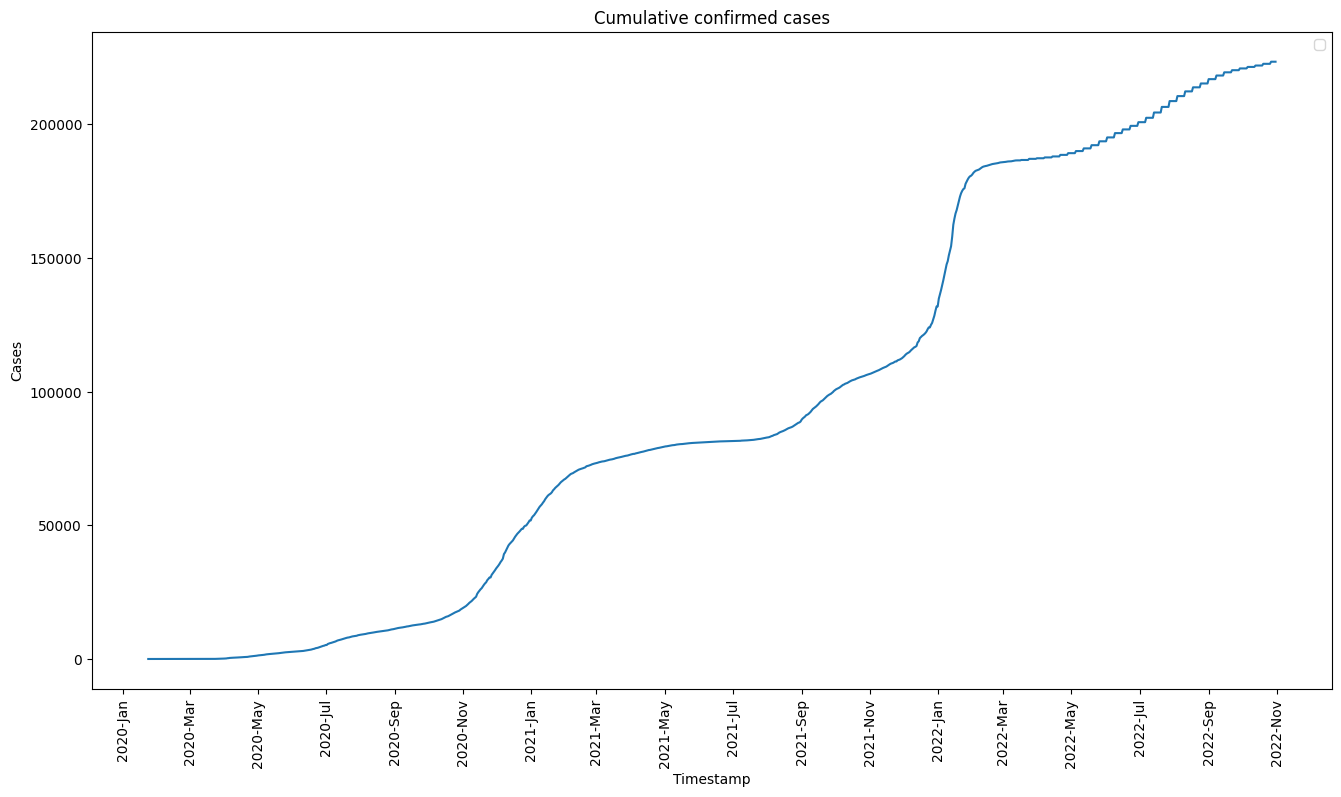

In [682]:
plt.figure(figsize = (16,9))
sns.lineplot(data=RAW_us_confirmed_county_T, x="datetime", y="cum_confirmed_cases")
plt.xlabel('Timestamp')
plt.ylabel('Cases')
plt.title('Cumulative confirmed cases')
plt.locator_params(axis='x', nbins=6)
plt.legend()
plt.xticks(rotation ='vertical')
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom = 0.15)
dtFmt = mat_date.DateFormatter('%Y-%b')
plt.gca().xaxis.set_major_formatter(dtFmt) 
plt.gca().xaxis.set_major_locator(mat_date.MonthLocator(interval=2))
plt.show()

### The chart of cumulative cases is not strictly increasing and it plateaued in between and then it started rising again after 2022 Jan when the Omicron variant was prominent and had high virality. But it saturated again after people started taking 2nd booster during Jan 2022

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


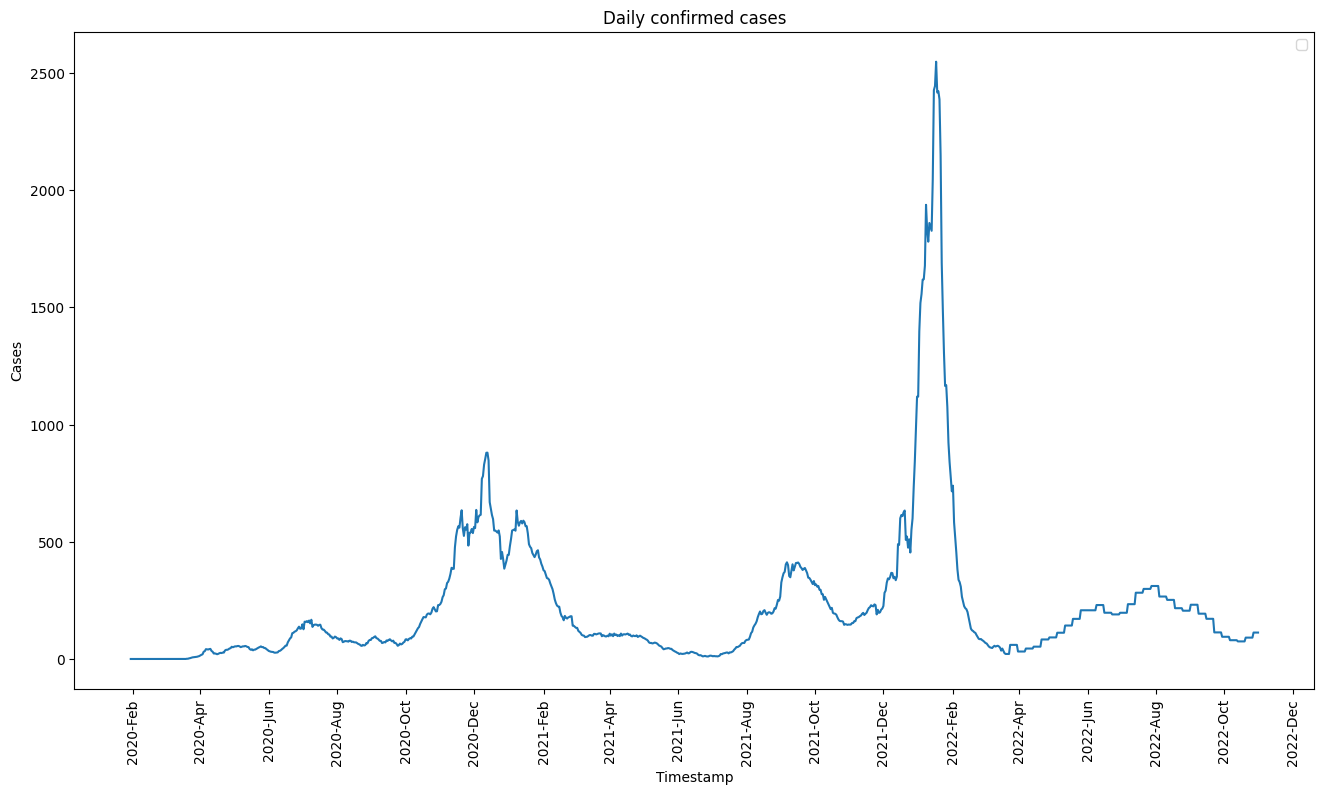

In [683]:
plt.figure(figsize = (16,9))
sns.lineplot(data=RAW_us_confirmed_county_T, x="datetime", y="daily_confirmed_cases")
plt.xlabel('Timestamp')
plt.ylabel('Cases')
plt.title('Daily confirmed cases')
plt.locator_params(axis='x', nbins=6)
plt.legend()
plt.xticks(rotation ='vertical')
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom = 0.15)
dtFmt = mat_date.DateFormatter('%Y-%b')
plt.gca().xaxis.set_major_formatter(dtFmt) 
plt.gca().xaxis.set_major_locator(mat_date.MonthLocator(interval=2))
plt.show()

### There are peaks in  the chart during the period - Oct 2020 and Dec 2020 when the cases started increasing in an uncontrolled manner as the vaccinations were not out for all the citizens. But the number of cases after Jan 2021 started decreasing and we could see some spikes periodically after that as well due to new variants

### Mapping the population to get the infection rate every month for the county

In [684]:
RAW_us_confirmed_county_T.head()

,date,cum_confirmed_cases,datetime,shifted_cum_cases,daily_confirmed_cases
1,1/24/20,0,2020-01-24,0.0,NaN
2,1/25/20,0,2020-01-25,0.0,NaN
3,1/26/20,0,2020-01-26,0.0,NaN
4,1/27/20,0,2020-01-27,0.0,NaN
5,1/28/20,0,2020-01-28,0.0,NaN


In [685]:
RAW_us_confirmed_county_T['daily_confirmed_cases_shifted']=RAW_us_confirmed_county_T['daily_confirmed_cases'].shift(1)

In [686]:
RAW_us_confirmed_county_T.dropna(subset='daily_confirmed_cases_shifted',inplace=True)

In [687]:
RAW_us_confirmed_county_T.head()

,date,cum_confirmed_cases,datetime,shifted_cum_cases,daily_confirmed_cases,daily_confirmed_cases_shifted
8,1/31/20,0,2020-01-31,0.0,0.0,0.0
9,2/1/20,0,2020-02-01,0.0,0.0,0.0
10,2/2/20,0,2020-02-02,0.0,0.0,0.0
11,2/3/20,0,2020-02-03,0.0,0.0,0.0
12,2/4/20,0,2020-02-04,0.0,0.0,0.0


### Mapping the population of the county to derive the infection rate

In [688]:
RAW_us_confirmed_county_T['population']=826139

### I am assuming here the population is constant across different months. Now calculating the infection rate by dividing daily confirmed cases with population

In [689]:
RAW_us_confirmed_county_T['infection_rate']=RAW_us_confirmed_county_T['daily_confirmed_cases']/RAW_us_confirmed_county_T['population']*100

In [690]:
RAW_us_confirmed_county_T.head()

,date,cum_confirmed_cases,datetime,shifted_cum_cases,daily_confirmed_cases,daily_confirmed_cases_shifted,population,infection_rate
8,1/31/20,0,2020-01-31,0.0,0.0,0.0,826139,0.0
9,2/1/20,0,2020-02-01,0.0,0.0,0.0,826139,0.0
10,2/2/20,0,2020-02-02,0.0,0.0,0.0,826139,0.0
11,2/3/20,0,2020-02-03,0.0,0.0,0.0,826139,0.0
12,2/4/20,0,2020-02-04,0.0,0.0,0.0,826139,0.0


In [691]:
RAW_us_confirmed_county_T.daily_confirmed_cases.max()

2548.285714285714

In [692]:
RAW_us_confirmed_county_T.infection_rate.min()

0.0

In [693]:
RAW_us_confirmed_county_T.infection_rate.max()

0.3084572589220112

In [694]:
# Getting the datetime and daily confirmed cases in array
date_arr=np.array(RAW_us_confirmed_county_T['datetime'])
case_arr=np.array(RAW_us_confirmed_county_T['daily_confirmed_cases'])

In [695]:
len((case_arr))

1005

In [696]:
np.nanmean(case_arr)

222.12494669509593

### Calculating the gradient at each point to figure out the inflection points and see what changed before that

Derivative is calculated by dividing the difference between current and last confirmed cases(delta X) with the change in time, which is 1 day in this case(delta Y)

Delta Y = 1 day

In [697]:
RAW_us_confirmed_county_T['cases_per_unit_time']=RAW_us_confirmed_county_T['daily_confirmed_cases']-RAW_us_confirmed_county_T['daily_confirmed_cases_shifted']

### Calculating the daily cases growth rate by dividing the difference in current and previous cases with the previous cases

The growth rate is calculated to check the trend in growth and idea was to see if the growth is consistent or if the change in growth is large and if yes, any potential reason can assessed to understand the cause.

In [698]:
RAW_us_confirmed_county_T['daily_cases_growth_rate']=RAW_us_confirmed_county_T['cases_per_unit_time']/RAW_us_confirmed_county_T['daily_confirmed_cases_shifted']*100

### Getting the change in the case growth rate

Calculating the derivative of the growth rate to calculate the slopes and this information can be used later to get
the inflection points

In [699]:

RAW_us_confirmed_county_T['growth_rate_change']=RAW_us_confirmed_county_T['daily_cases_growth_rate']-RAW_us_confirmed_county_T['daily_cases_growth_rate'].shift(1)
RAW_us_confirmed_county_T.head()

,date,cum_confirmed_cases,datetime,shifted_cum_cases,daily_confirmed_cases,daily_confirmed_cases_shifted,population,infection_rate,cases_per_unit_time,daily_cases_growth_rate,growth_rate_change
8,1/31/20,0,2020-01-31,0.0,0.0,0.0,826139,0.0,0.0,NaN,NaN
9,2/1/20,0,2020-02-01,0.0,0.0,0.0,826139,0.0,0.0,NaN,NaN
10,2/2/20,0,2020-02-02,0.0,0.0,0.0,826139,0.0,0.0,NaN,NaN
11,2/3/20,0,2020-02-03,0.0,0.0,0.0,826139,0.0,0.0,NaN,NaN
12,2/4/20,0,2020-02-04,0.0,0.0,0.0,826139,0.0,0.0,NaN,NaN


In [700]:
RAW_us_confirmed_county_T.head()

,date,cum_confirmed_cases,datetime,shifted_cum_cases,daily_confirmed_cases,daily_confirmed_cases_shifted,population,infection_rate,cases_per_unit_time,daily_cases_growth_rate,growth_rate_change
8,1/31/20,0,2020-01-31,0.0,0.0,0.0,826139,0.0,0.0,NaN,NaN
9,2/1/20,0,2020-02-01,0.0,0.0,0.0,826139,0.0,0.0,NaN,NaN
10,2/2/20,0,2020-02-02,0.0,0.0,0.0,826139,0.0,0.0,NaN,NaN
11,2/3/20,0,2020-02-03,0.0,0.0,0.0,826139,0.0,0.0,NaN,NaN
12,2/4/20,0,2020-02-04,0.0,0.0,0.0,826139,0.0,0.0,NaN,NaN


In [701]:
US_mask_mandates_county['date']=pd.to_datetime(US_mask_mandates_county['date'])

In [702]:

US_mask_mandates_county['Source_of_Action'].replace(np.nan,'UNK',inplace=True)

### Cleaning the column- face_masks_required_in_public in US mask madate dataset

The data of initial months doesn't contain the data. 

Converting the data to numerical format for further analysis

In [703]:
US_mask_mandates_county.replace({'Face_Masks_Required_in_Public':{np.nan:-1,'Yes':1,'No':0}},inplace=True)

In [704]:
US_mask_mandates_county['Face_Masks_Required_in_Public'].value_counts()

 1    329
-1     89
 0     75
Name: Face_Masks_Required_in_Public, dtype: int64

In [705]:
US_mask_mandates_county.head()

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
551271,OH,Hamilton County,39,61,2020-04-15,2,-1,UNK,NaN,NaN
551301,OH,Hamilton County,39,61,2020-04-16,2,-1,UNK,NaN,NaN
551420,OH,Hamilton County,39,61,2020-04-10,2,-1,UNK,NaN,NaN
551421,OH,Hamilton County,39,61,2020-04-11,2,-1,UNK,NaN,NaN
551422,OH,Hamilton County,39,61,2020-04-12,2,-1,UNK,NaN,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


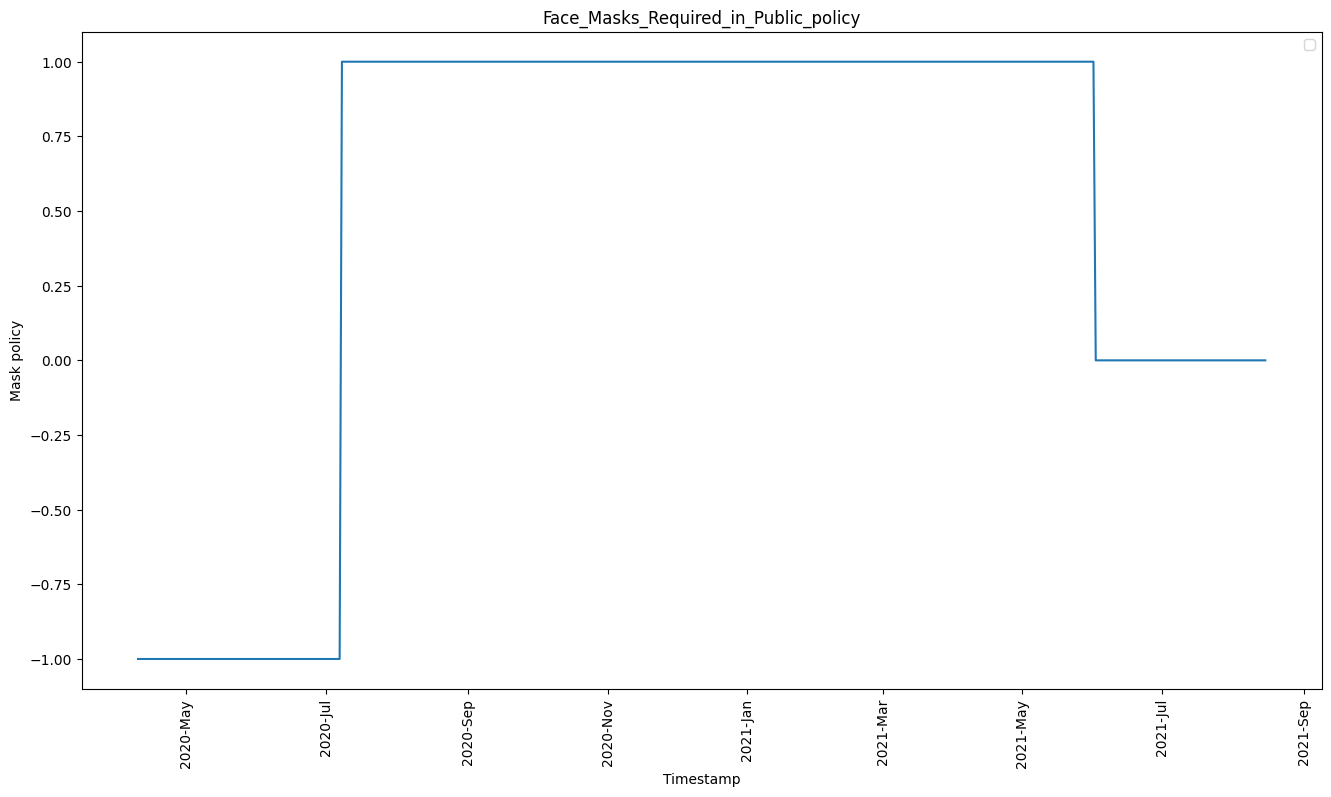

In [706]:
plt.figure(figsize = (16,9))
sns.lineplot(data=US_mask_mandates_county, x="date", y="Face_Masks_Required_in_Public")
plt.xlabel('Timestamp')
plt.ylabel('Mask policy')
plt.title('Face_Masks_Required_in_Public_policy')
plt.locator_params(axis='x', nbins=6)
plt.legend()
plt.xticks(rotation ='vertical')
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom = 0.15)
dtFmt = mat_date.DateFormatter('%Y-%b')
plt.gca().xaxis.set_major_formatter(dtFmt) 
plt.gca().xaxis.set_major_locator(mat_date.MonthLocator(interval=2))
plt.show()

In the above chart, -1 means the policy is unknown, 1 means Mask mandate in enforced , 0 means mask mandate is lifted.

From the chart, it can be seen that the mask policy is changed only once on June 2021. Before that the mask mandate was enforced after July 2020 and after that there was no mask mandate.

During the months of July 2020 there was rising concerns around the spread of the virus as then there was no vaccination and hospitalization rate was high.



### Overlapping the mask mandate policy with confirmed cases data for the period- Feb 1,2020 to Oct 1,2021

In [707]:
start_time=datetime(2020,2,1)
end_time=datetime(2021,10,1)

In [708]:
US_mask_mandates_county_filtered= US_mask_mandates_county[(US_mask_mandates_county['date']>start_time) & (US_mask_mandates_county['date']<end_time)]

In [709]:
RAW_us_confirmed_county_T_filtered= RAW_us_confirmed_county_T[(RAW_us_confirmed_county_T['datetime']>start_time) & (RAW_us_confirmed_county_T['datetime']<end_time)]

### Merging the mask mandate data with the confirmed cases data

In [710]:
RAW_us_confirmed_county_T_filtered=RAW_us_confirmed_county_T_filtered.merge(US_mask_mandates_county[['date','Face_Masks_Required_in_Public']],left_on='datetime',right_on='date')

In [711]:
RAW_us_confirmed_county_T_filtered.head()

,date_x,cum_confirmed_cases,datetime,shifted_cum_cases,daily_confirmed_cases,daily_confirmed_cases_shifted,population,infection_rate,cases_per_unit_time,daily_cases_growth_rate,growth_rate_change,date_y,Face_Masks_Required_in_Public
0,4/10/20,504,2020-04-10,473.0,43.000000,42.142857,826139,0.005205,0.857143,0.020339,-0.022064,2020-04-10,-1
1,4/11/20,529,2020-04-11,504.0,34.428571,43.000000,826139,0.004167,-8.571429,-0.199336,-0.219675,2020-04-11,-1
2,4/12/20,535,2020-04-12,529.0,30.857143,34.428571,826139,0.003735,-3.571429,-0.103734,0.095601,2020-04-12,-1
3,4/13/20,558,2020-04-13,535.0,23.428571,30.857143,826139,0.002836,-7.428571,-0.240741,-0.137006,2020-04-13,-1
4,4/14/20,576,2020-04-14,558.0,23.571429,23.428571,826139,0.002853,0.142857,0.006098,0.246838,2020-04-14,-1


### Plotting the daily confirmed cases overlapped with the mask mandate policy

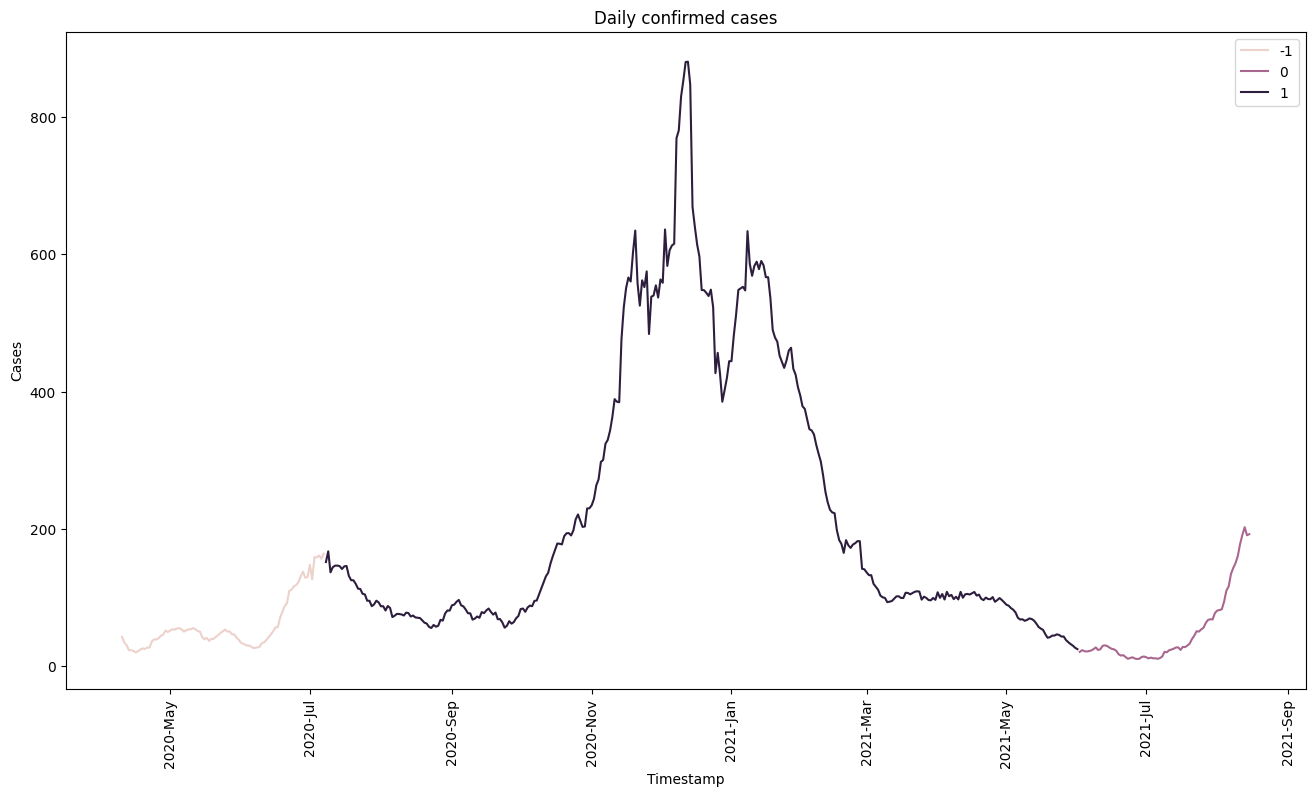

<Figure size 640x480 with 0 Axes>

In [743]:
plt.figure(figsize = (16,9))
sns.lineplot(data=RAW_us_confirmed_county_T_filtered, x="datetime", y="daily_confirmed_cases",hue='Face_Masks_Required_in_Public')
plt.xlabel('Timestamp')
plt.ylabel('Cases')
plt.title('Daily confirmed cases')
plt.locator_params(axis='x', nbins=6)
plt.legend()
plt.xticks(rotation ='vertical')
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom = 0.15)
dtFmt = mat_date.DateFormatter('%Y-%b')
plt.gca().xaxis.set_major_formatter(dtFmt) 
plt.gca().xaxis.set_major_locator(mat_date.MonthLocator(interval=2))
plt.show()
plt.savefig('Output Data\Daily confirmed cases.png')

### We can see that as the mask policy changed to ‘Yes’/1 , the infection rate started soaring. Although it seems counter-intuitive this could be because the mask mandate policy was enforced as the cases started soaring. But later, the infection rate started decreasing which could be because of the continuation of the mask mandate and  vaccinations came around. The rising trend during the mask mandate could also be due to more testing and reported cases. Later , When the mask mandate policy was lifted, the infection rate kept decreasing for a while before it started increasing again.


### Plotting the daily confirmed cases overlapped with the mask mandate policy

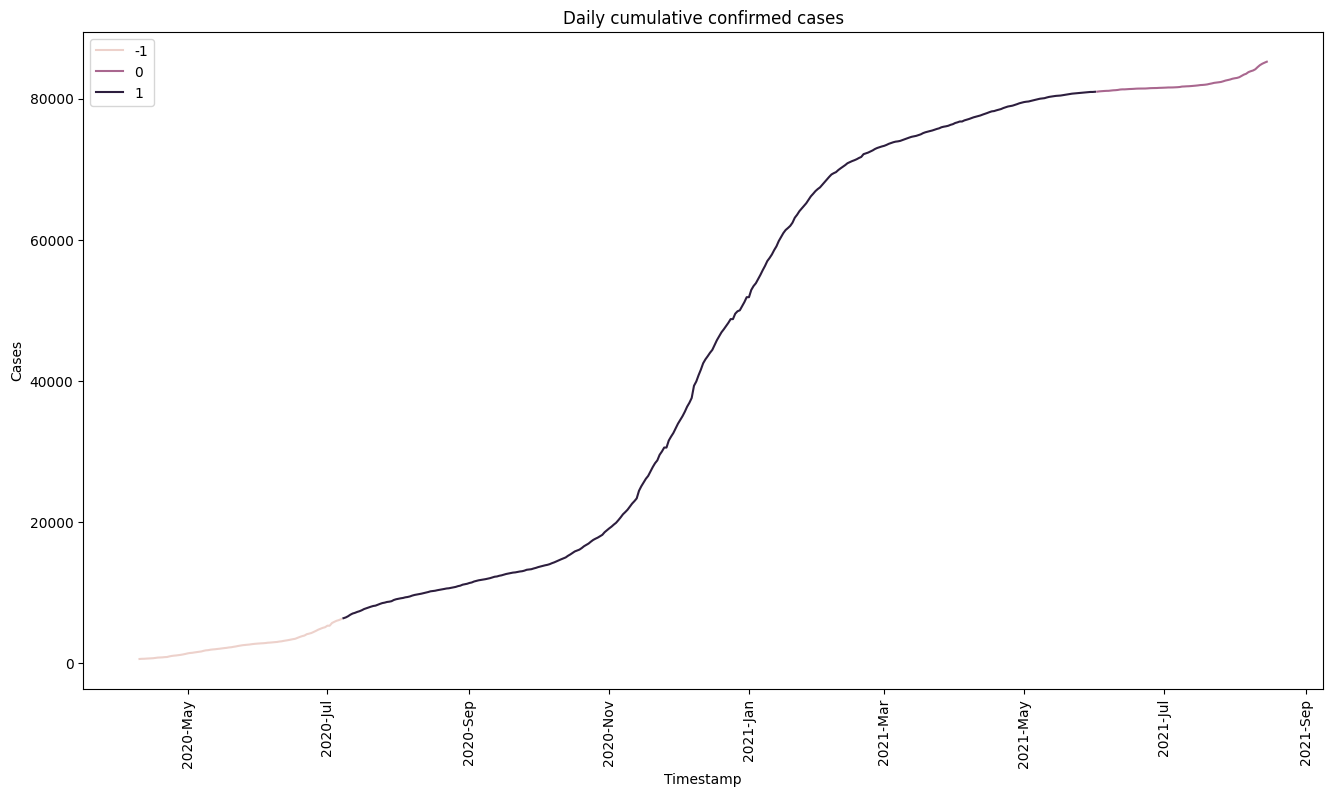

<Figure size 640x480 with 0 Axes>

In [742]:
plt.figure(figsize = (16,9))
sns.lineplot(data=RAW_us_confirmed_county_T_filtered, x="datetime", y="cum_confirmed_cases",hue='Face_Masks_Required_in_Public')
plt.xlabel('Timestamp')
plt.ylabel('Cases')
plt.title('Daily cumulative confirmed cases')
plt.locator_params(axis='x', nbins=6)
plt.legend()
plt.xticks(rotation ='vertical')
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom = 0.15)
dtFmt = mat_date.DateFormatter('%Y-%b')
plt.gca().xaxis.set_major_formatter(dtFmt) 
plt.gca().xaxis.set_major_locator(mat_date.MonthLocator(interval=2))
plt.show()
plt.savefig('Output Data\Daily cumulative confirmed cases.png')

### Plotting the infection rate overlapped with the mask mandate policy

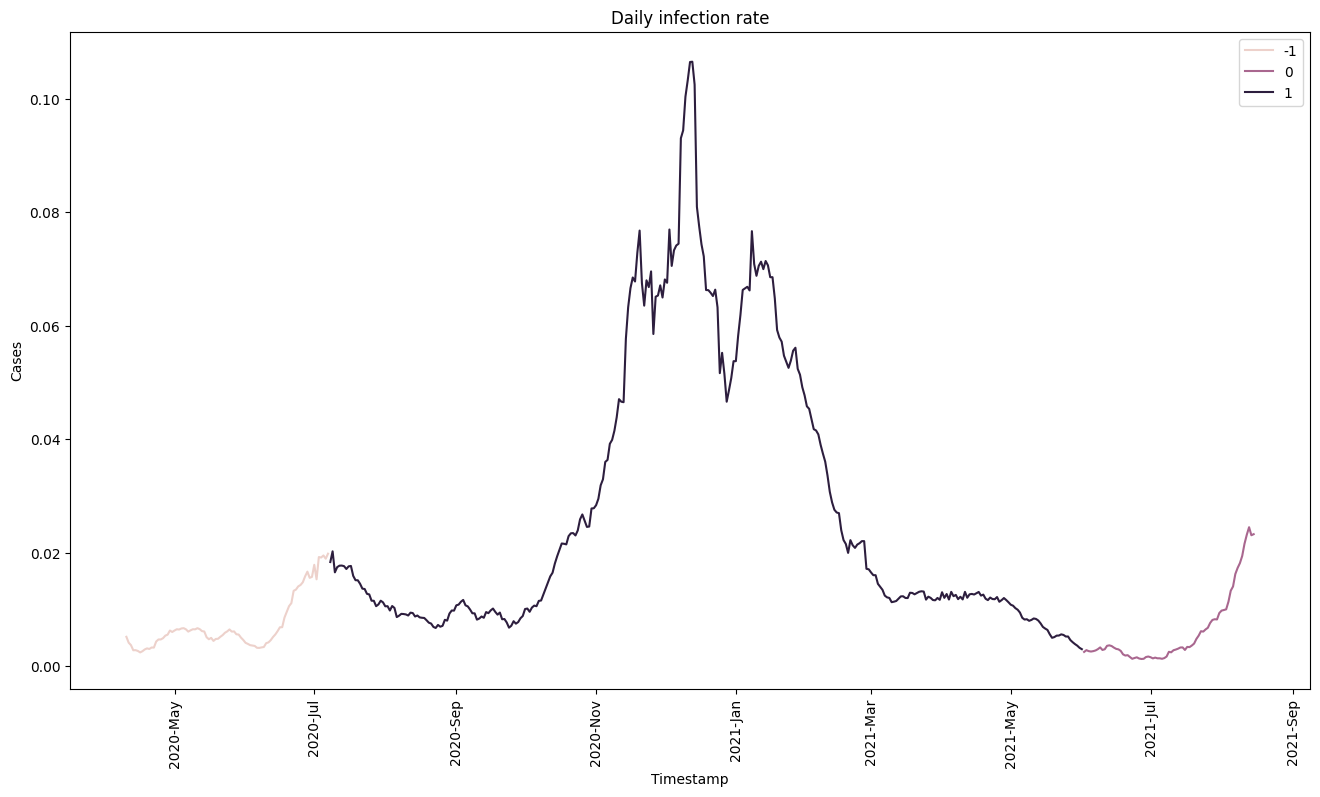

<Figure size 640x480 with 0 Axes>

In [741]:
plt.figure(figsize = (16,9))
sns.lineplot(data=RAW_us_confirmed_county_T_filtered, x="datetime", y="infection_rate",hue='Face_Masks_Required_in_Public')
plt.xlabel('Timestamp')
plt.ylabel('Cases')
plt.title('Daily infection rate')
plt.locator_params(axis='x', nbins=6)
plt.legend()
plt.xticks(rotation ='vertical')
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom = 0.15)
dtFmt = mat_date.DateFormatter('%Y-%b')
plt.gca().xaxis.set_major_formatter(dtFmt) 
plt.gca().xaxis.set_major_locator(mat_date.MonthLocator(interval=2))
plt.show()
plt.savefig('Output Data\Daily infection rate.png')

### The infection rate chart is similar to the daily confirmed cases rate since the infection rate is daily_confirmed_cases/population and population is a constant

### Plotting the case growth rate

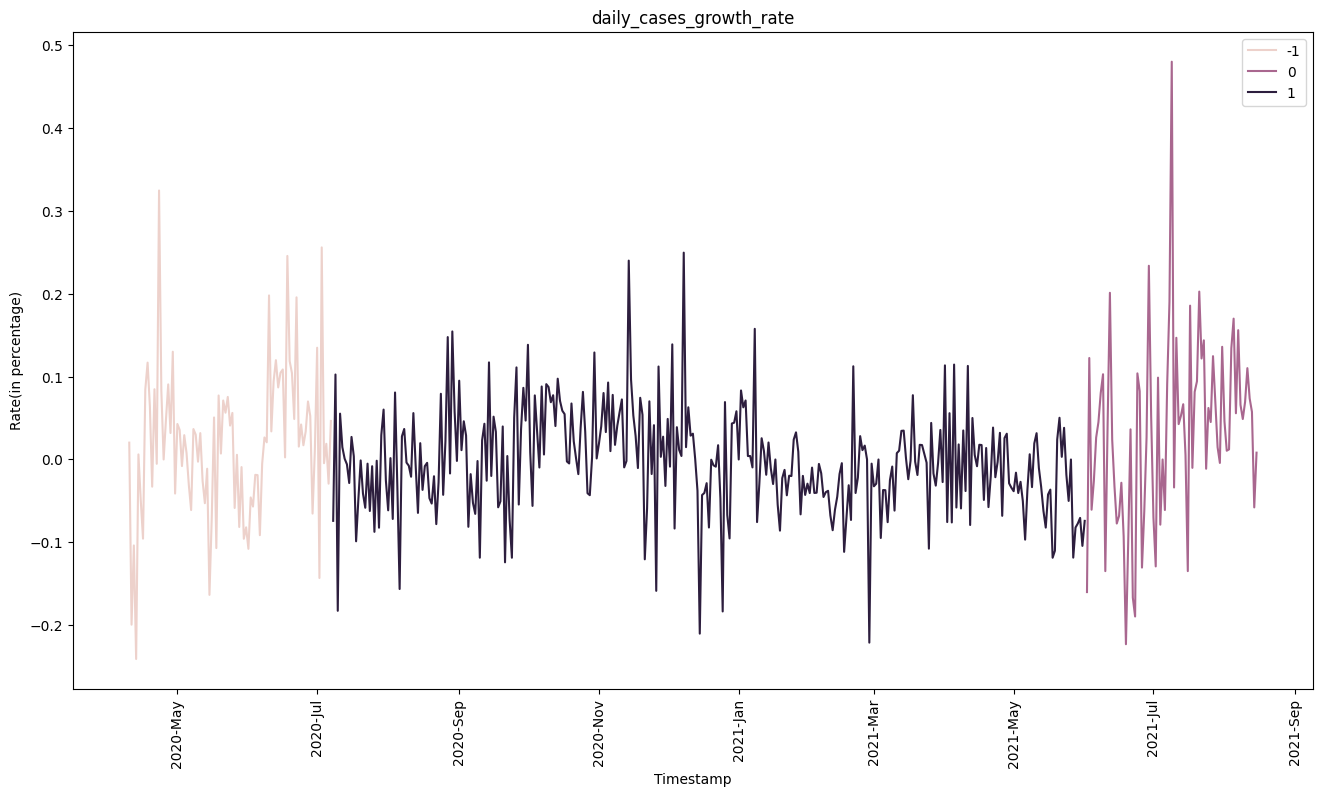

<Figure size 640x480 with 0 Axes>

In [740]:
plt.figure(figsize = (16,9))
sns.lineplot(data=RAW_us_confirmed_county_T_filtered, x="datetime", y="daily_cases_growth_rate",hue='Face_Masks_Required_in_Public')
plt.xlabel('Timestamp')
plt.ylabel('Rate(in percentage)')
plt.title('daily_cases_growth_rate')
plt.locator_params(axis='x', nbins=6)
plt.legend()
plt.xticks(rotation ='vertical')
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom = 0.15)
dtFmt = mat_date.DateFormatter('%Y-%b')
plt.gca().xaxis.set_major_formatter(dtFmt) 
plt.gca().xaxis.set_major_locator(mat_date.MonthLocator(interval=2))
plt.show()
plt.savefig('Output Data\daily_cases_growth_rate.png')

It's hard to draw inferences from the above chart as there is lot of fluctuations in day-to-day growth rate

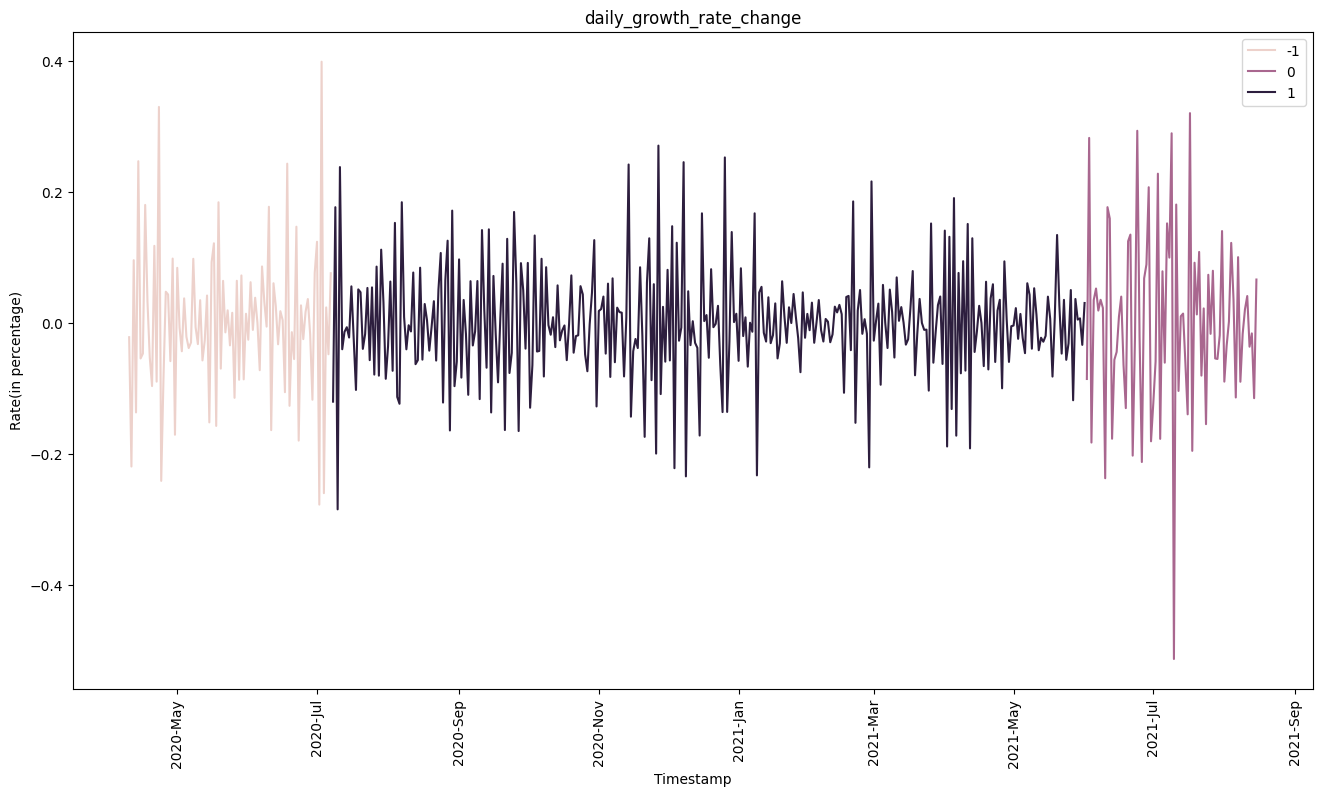

In [716]:
plt.figure(figsize = (16,9))
sns.lineplot(data=RAW_us_confirmed_county_T_filtered, x="datetime", y="growth_rate_change",hue='Face_Masks_Required_in_Public')
plt.xlabel('Timestamp')
plt.ylabel('Rate(in percentage)')
plt.title('daily_growth_rate_change')
plt.locator_params(axis='x', nbins=6)
plt.legend()
plt.xticks(rotation ='vertical')
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom = 0.15)
dtFmt = mat_date.DateFormatter('%Y-%b')
plt.gca().xaxis.set_major_formatter(dtFmt) 
plt.gca().xaxis.set_major_locator(mat_date.MonthLocator(interval=2))
plt.show()

### Detect the change points

The change points are derived by using the rupture package and then change points were used to show the vertical lines in the plot where the change occurs.

In [723]:

algo1 = rpt.Pelt(model="rbf").fit(np.array(RAW_us_confirmed_county_T_filtered['daily_confirmed_cases']))
change_location1 = algo1.predict(pen=10)

In [730]:
np.array(RAW_us_confirmed_county_T_filtered['daily_confirmed_cases'])

array([ 43.        ,  34.42857143,  30.85714286,  23.42857143,
        23.57142857,  22.42857143,  20.28571429,  22.        ,
        24.57142857,  26.14285714,  25.28571429,  27.42857143,
        27.28571429,  36.14285714,  39.14285714,  39.14285714,
        41.        ,  44.71428571,  46.14285714,  52.14285714,
        50.        ,  52.14285714,  54.        ,  53.57142857,
        55.14285714,  55.57142857,  53.85714286,  50.57142857,
        52.42857143,  54.        ,  53.85714286,  55.57142857,
        54.14285714,  51.28571429,  50.71428571,  42.42857143,
        39.42857143,  41.42857143,  37.        ,  39.85714286,
        40.14285714,  43.        ,  45.42857143,  48.85714286,
        50.85714286,  53.71428571,  50.57142857,  50.85714286,
        46.71428571,  46.28571429,  41.85714286,  38.42857143,
        34.28571429,  32.71428571,  30.85714286,  30.28571429,
        29.71428571,  27.        ,  26.85714286,  27.57142857,
        28.14285714,  33.71428571,  34.85714286,  38.14

In [724]:
change_location1

[70, 105, 185, 210, 305, 325, 400, 480, 493]

In [735]:
# Point the change points:
def plot_change_points(ts,var,ts_change_loc):
    plt.figure(figsize=(16,4))
    
    sns.lineplot(data=ts, x="datetime", y=var,hue='Face_Masks_Required_in_Public')
    plt.xlabel('Timestamp')
    plt.ylabel('Cases')
    plt.title(var)
    plt.locator_params(axis='x', nbins=6)
    plt.legend()
    plt.xticks(rotation ='vertical')
    # Tweak spacing to prevent clipping of tick-labels
    plt.subplots_adjust(bottom = 0.15)
    dtFmt = mat_date.DateFormatter('%Y-%b')
    plt.gca().xaxis.set_major_formatter(dtFmt) 
    plt.gca().xaxis.set_major_locator(mat_date.MonthLocator(interval=2))
    for x in ts_change_loc:
        plt.axvline(RAW_us_confirmed_county_T_filtered.datetime.iloc[x-1],lw=2, color='red')
  
    

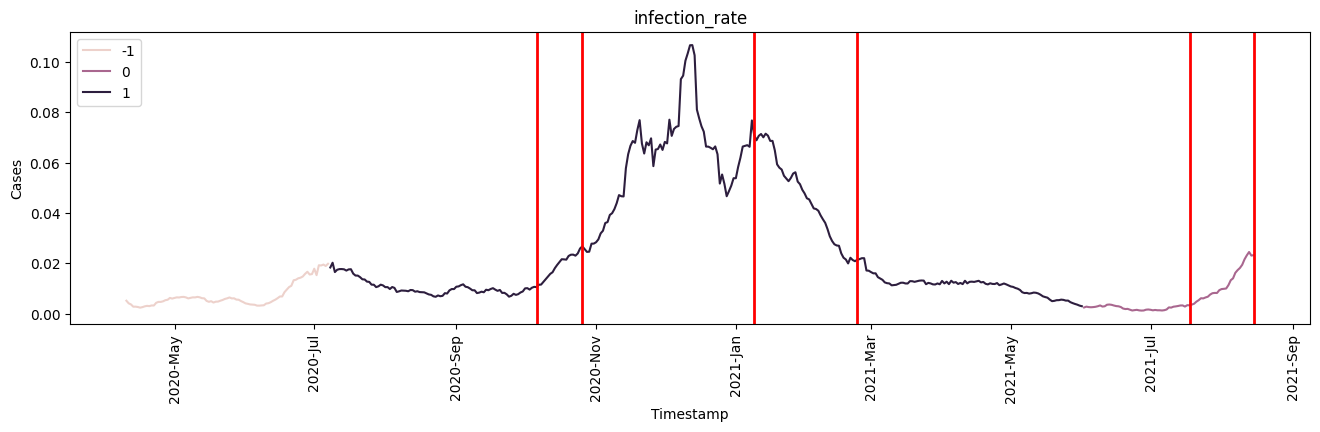

In [739]:
plot_change_points(RAW_us_confirmed_county_T_filtered,'infection_rate',change_location1)
plt.savefig('Output Data\infection_rate.png')

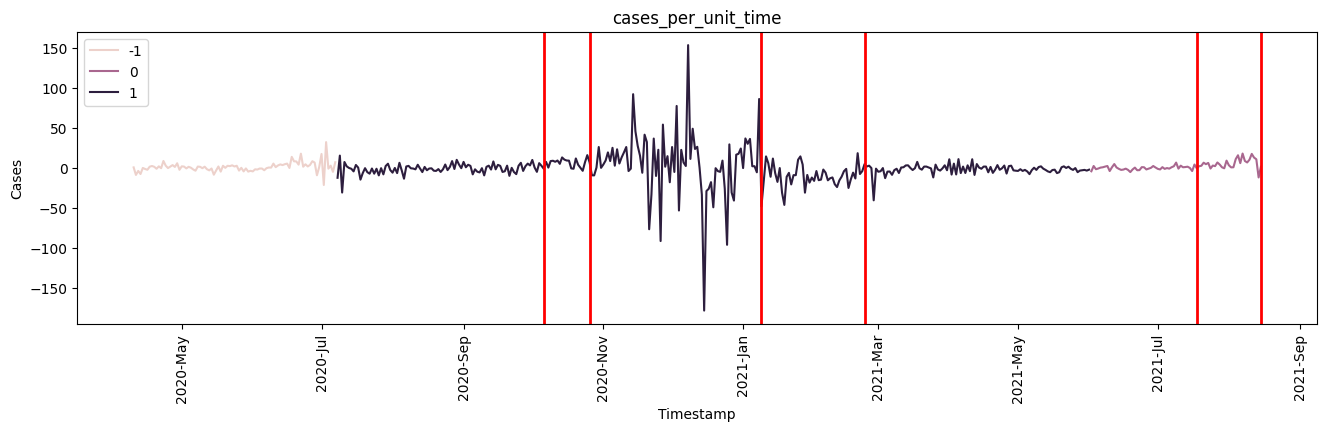

In [738]:

algo1 = rpt.Pelt(model="rbf").fit(np.array(RAW_us_confirmed_county_T_filtered['cases_per_unit_time']))
change_location1 = algo1.predict(pen=5)
plot_change_points(RAW_us_confirmed_county_T_filtered,'cases_per_unit_time',change_location1)

plt.savefig('Output Data\cases_per_unit_time.png')

The above chart represents the first derivative of infection rate. The plot is same as first derivative of case change i.e change in cases unit of time.

### Summary

I observed that the effects of mask mandate policies where not immediate but with certain assumptions and  theories we can attribute change in figures to the mask policy change. With more data I could have implied my conclusion with more certaininty.

We can see that as the mask policy changed to ‘Yes’/1 , the infection rate started soaring. Although it seems counter-intuitive this could be because the mask mandate policy was enforced as the cases started soaring. But later, the infection rate started decreasing which could be because of the continuation of the mask mandate and  vaccinations came around. The rising trend during the mask mandate could also be due to more testing and reported cases. Later , When the mask mandate policy was lifted, the infection rate kept decreasing for a while before it started increasing again.